Import the basic libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


Read the Bicycle Dataset

In [2]:
hourlyBicycleDataset = pd.read_csv('./Bike-Sharing-Dataset/hour.csv')

Check the size of the dataset, features of an observations, and data type of each feature

In [3]:
hourlyBicycleDataset.shape

(17379, 17)

In [4]:
hourlyBicycleDataset.head(-1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,17374,2012-12-31,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [5]:
hourlyBicycleDataset.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Drop Unnecessary Feature (Possibly will use in the future)

In [6]:
hourlyBicycleDataset = hourlyBicycleDataset.drop(['instant', 'dteday', 'holiday', 'yr', 'casual', 'registered'], axis=1)

In [7]:
hourlyBicycleDataset.head(3)

,season,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,1,1,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,1,2,6,0,1,0.22,0.2727,0.80,0.0,32


Check if any data is missing

In [8]:
hourlyBicycleDataset.isna().sum()

season        0
mnth          0
hr            0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Data Plotting

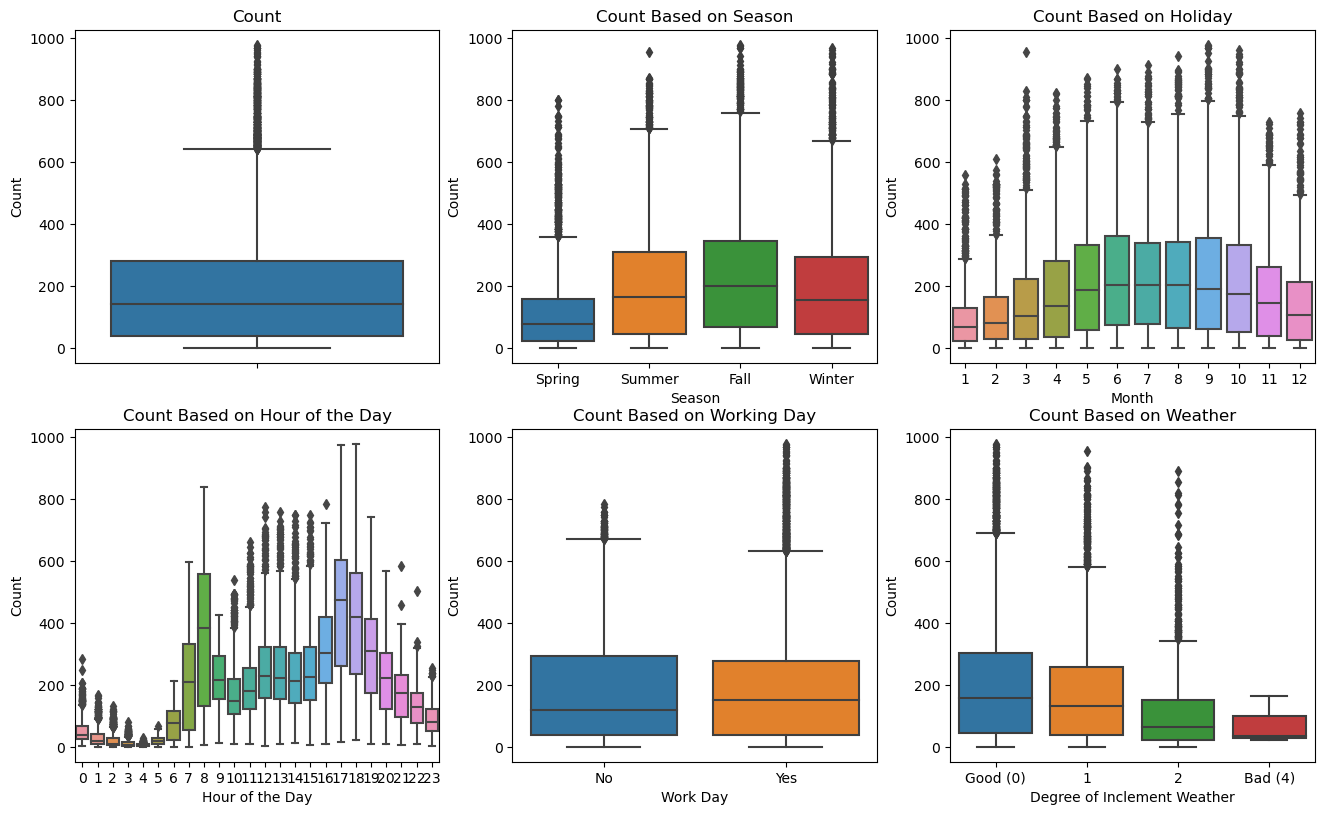

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(16, 9.5)

sns.boxplot(data=hourlyBicycleDataset, y='cnt', ax=axes[0, 0])
sns.boxplot(data=hourlyBicycleDataset, x='season', y='cnt', ax=axes[0, 1])
sns.boxplot(data=hourlyBicycleDataset, x='mnth', y='cnt', ax=axes[0, 2])
sns.boxplot(data=hourlyBicycleDataset, x='hr', y='cnt', ax=axes[1, 0])
sns.boxplot(data=hourlyBicycleDataset, x='workingday', y='cnt', ax=axes[1, 1])
sns.boxplot(data=hourlyBicycleDataset, x='weathersit', y='cnt', ax=axes[1, 2])

axes[0, 0].set(ylabel='Count', title='Count')

axes[0, 1].set(xlabel='Season', ylabel='Count', title='Count Based on Season')
axes[0, 1].set_xticklabels( ('Spring', 'Summer', 'Fall', 'Winter'))

axes[0, 2].set(xlabel='Month', ylabel='Count', title='Count Based on Holiday')

axes[1, 0].set(xlabel='Hour of the Day', ylabel='Count', title='Count Based on Hour of the Day')

axes[1, 1].set(xlabel='Work Day', ylabel='Count', title='Count Based on Working Day')
axes[1, 1].set_xticklabels( ('No', 'Yes'))

axes[1, 2].set(xlabel='Degree of Inclement Weather', ylabel='Count', title='Count Based on Weather')
axes[1, 2].set_xticklabels( ('Good (0)', '1', '2', 'Bad (4)'))

plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#f7fbff'

Here, we can see that numerous existing outliers, which could potentially bring down models' performance. Therefore, we will drop severe outliers.

In [10]:
mean = hourlyBicycleDataset['cnt'].mean()
std = hourlyBicycleDataset['cnt'].std()

hourlyBicycleDataset = hourlyBicycleDataset[np.abs(hourlyBicycleDataset['cnt'] - mean) <= 3*std]
hourlyBicycleDataset.shape

(17135, 11)

In [11]:
def changeNumToStr(month):
    if month == 0:
        return 'Sunday'
    elif month == 1:
        return 'Monday'
    elif month == 2:
        return 'Tuesday'
    elif month == 3:
        return 'Wednesday'
    elif month == 4:
        return 'Thursday'
    elif month == 5:
        return 'Friday'
    else:
        return 'Saturday'

In [12]:
def changeNumToSeason(season):
    if season == 1:
        return 'Spring'
    elif season == 2:
        return 'Summer'
    elif season == 3:
        return 'Fall'
    else:
        return 'Winter'

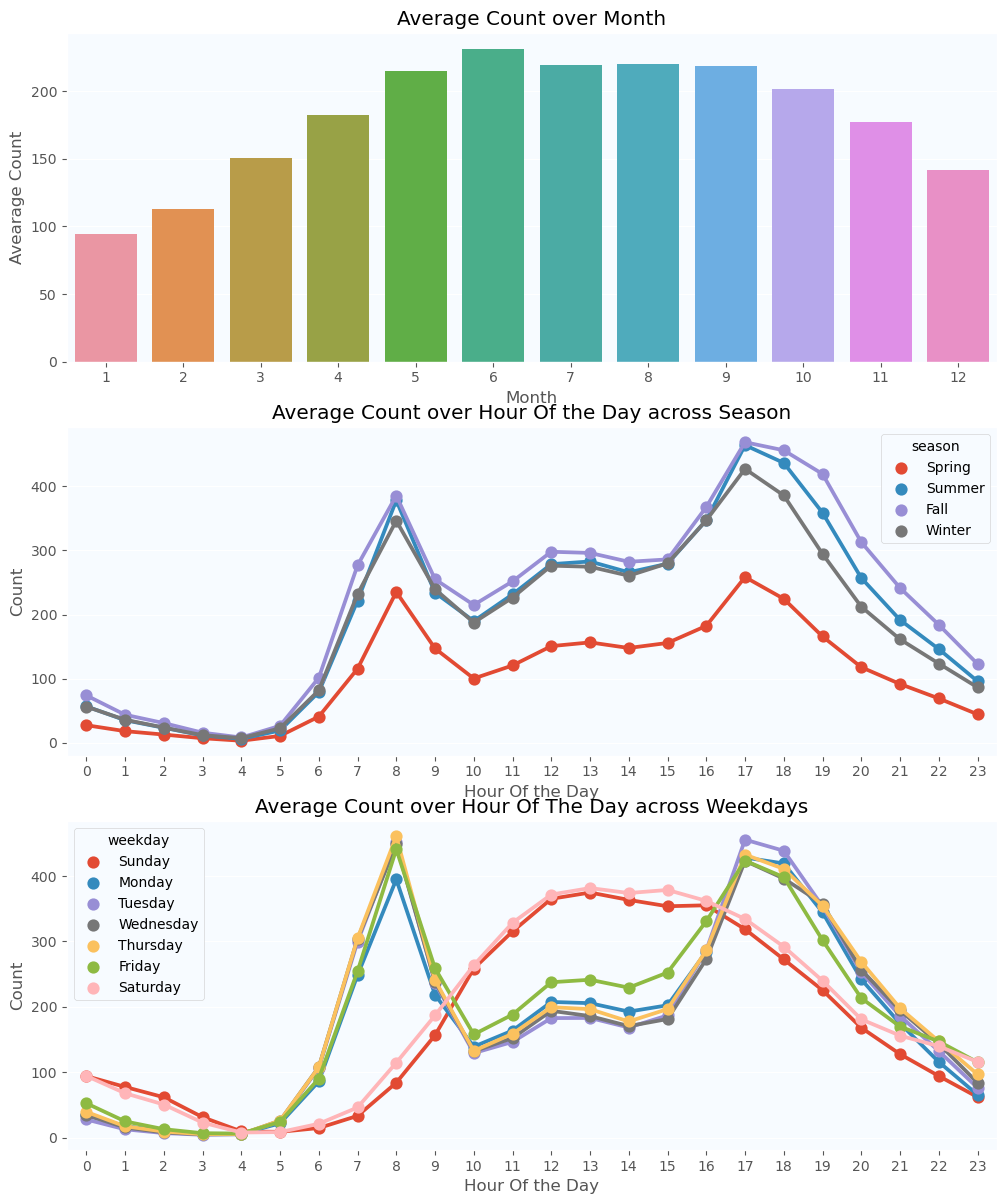

In [13]:
fig, (ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(12,14.5)

avgOverMonth = pd.DataFrame(hourlyBicycleDataset.groupby("mnth")["cnt"].mean()).reset_index()
monthSorted = avgOverMonth.sort_values(by="cnt", ascending=False)
sns.barplot(data=monthSorted, x="mnth", y="cnt", ax=ax1)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count over Month")

avgOverHour = pd.DataFrame(hourlyBicycleDataset.groupby(["hr", "season"], sort=True)["cnt"].mean()).reset_index()
avgOverHour['season'] = avgOverHour.season.apply(changeNumToSeason)
sns.pointplot(x=avgOverHour["hr"], y=avgOverHour["cnt"], hue=avgOverHour["season"], data=avgOverHour, join=True, ax=ax2)
ax2.set(xlabel='Hour Of the Day', ylabel='Count',title="Average Count over Hour Of the Day across Season", label='big')

avgOverHour = pd.DataFrame(hourlyBicycleDataset.groupby(["hr", "weekday"],sort=True)["cnt"].mean()).reset_index()
avgOverHour['weekday'] = avgOverHour.weekday.apply(changeNumToStr)
sns.pointplot(x=avgOverHour["hr"], y=avgOverHour["cnt"], hue=avgOverHour['weekday'], data=avgOverHour, join=True, ax=ax3)
ax3.set(xlabel='Hour Of the Day', ylabel='Count', title="Average Count over Hour Of The Day across Weekdays", label='big')

plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#f7fbff'

Correlation

<AxesSubplot: >

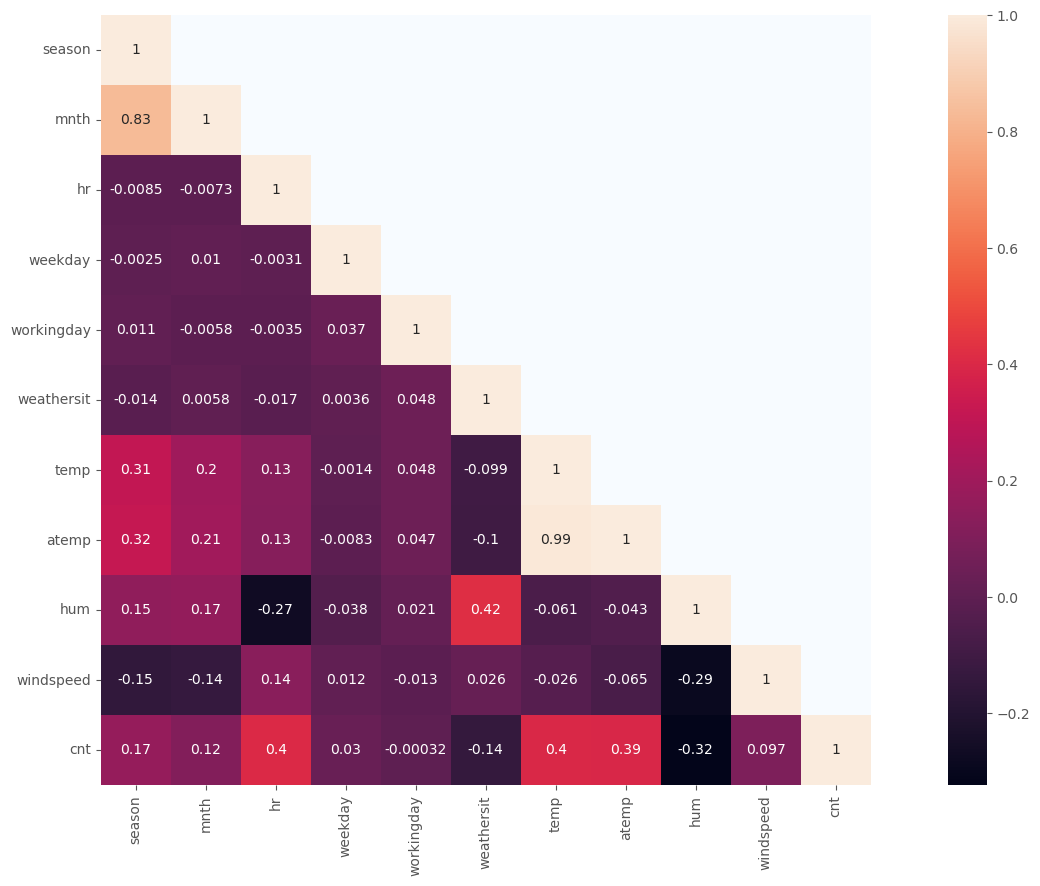

In [14]:
mask = hourlyBicycleDataset.corr()
mask = np.array(mask)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(hourlyBicycleDataset.corr(), mask=mask, annot=True, square=True)

It is noticeable that atemp and temp have high correlation that is close to 1, which shows that we need to drop one of them to avoid multi-collinearity.

In [15]:
hourlyBicycleDataset = hourlyBicycleDataset.drop(['temp'], axis=1)